In [1]:
import matplotlib.pyplot as plt

import utils
import pandas as pd
import classifiers
import evaluations

In [2]:
df5s, df10s, df30s = utils.task4_df()

In [3]:
whole_df = pd.concat((df5s, df10s, df30s), ignore_index=True)

In [4]:
X_train, y_train, X_val, y_val = utils.train_val_split(whole_df)

In [5]:
y_val_pred = classifiers.tensorflow_fcnn(X_train, y_train, X_val, y_val)

Epoch 1/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5756 - loss: 1.2287 - val_accuracy: 0.8919 - val_loss: 0.3542
Epoch 2/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9561 - loss: 0.1454 - val_accuracy: 0.9182 - val_loss: 0.2568
Epoch 3/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9086 - val_loss: 0.2756
Epoch 4/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9932 - loss: 0.0287 - val_accuracy: 0.8848 - val_loss: 0.4394
Epoch 5/100
248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.0263 - val_accuracy: 0.9192 - val_loss: 0.3179
62/62 - 0s - 778us/step - accuracy: 0.9192 - loss: 0.3179
{'accuracy': 0.9191918969154358, 'loss': 0.31788790225982666}


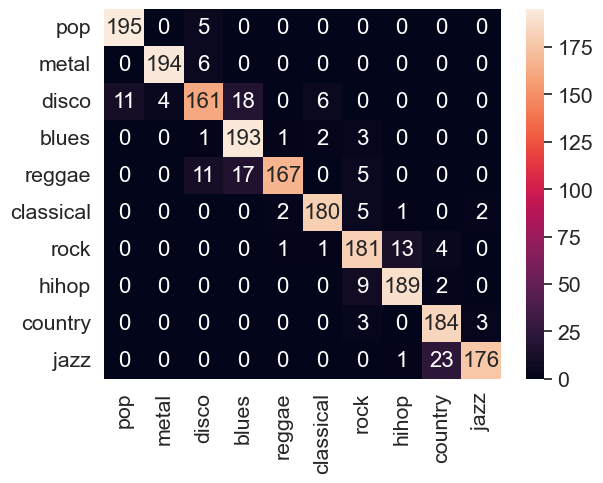

In [6]:
evaluations.conf_matrix(y_val_pred, y_val)

In [7]:
perf_dl =evaluations.multiclass_performance_metrics(y_val_pred, y_val, labels=utils.genreNames)

Accuracy : 0.9383838383838384


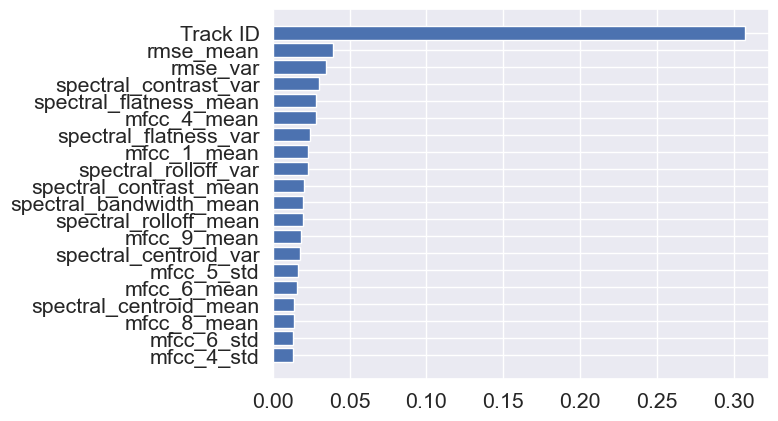

In [8]:
y_val_pred = classifiers.sklearn_rf(X_train, y_train, X_val, y_val)

The 4 most important features for the random forest are [rmse_mean, rmse_var, spectral_contrast_var, mfcc_4_mean]

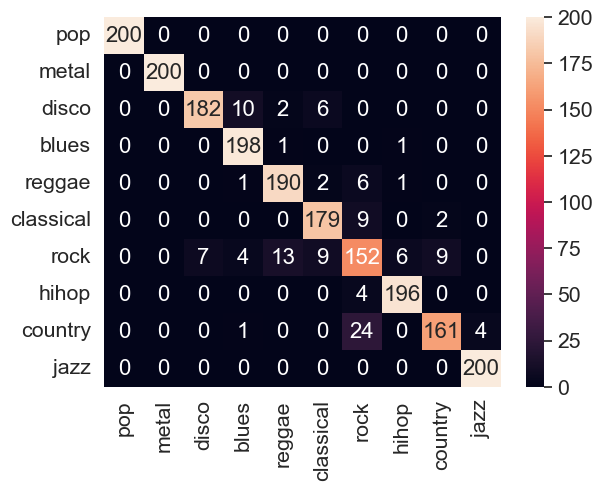

In [9]:
evaluations.conf_matrix(y_val_pred, y_val)

In [10]:
perf_rf = evaluations.multiclass_performance_metrics(y_val_pred, y_val)


Mean f1 score for deep learning : 0.9190319005386943
Mean f1 score for random forest : 0.937519517317418


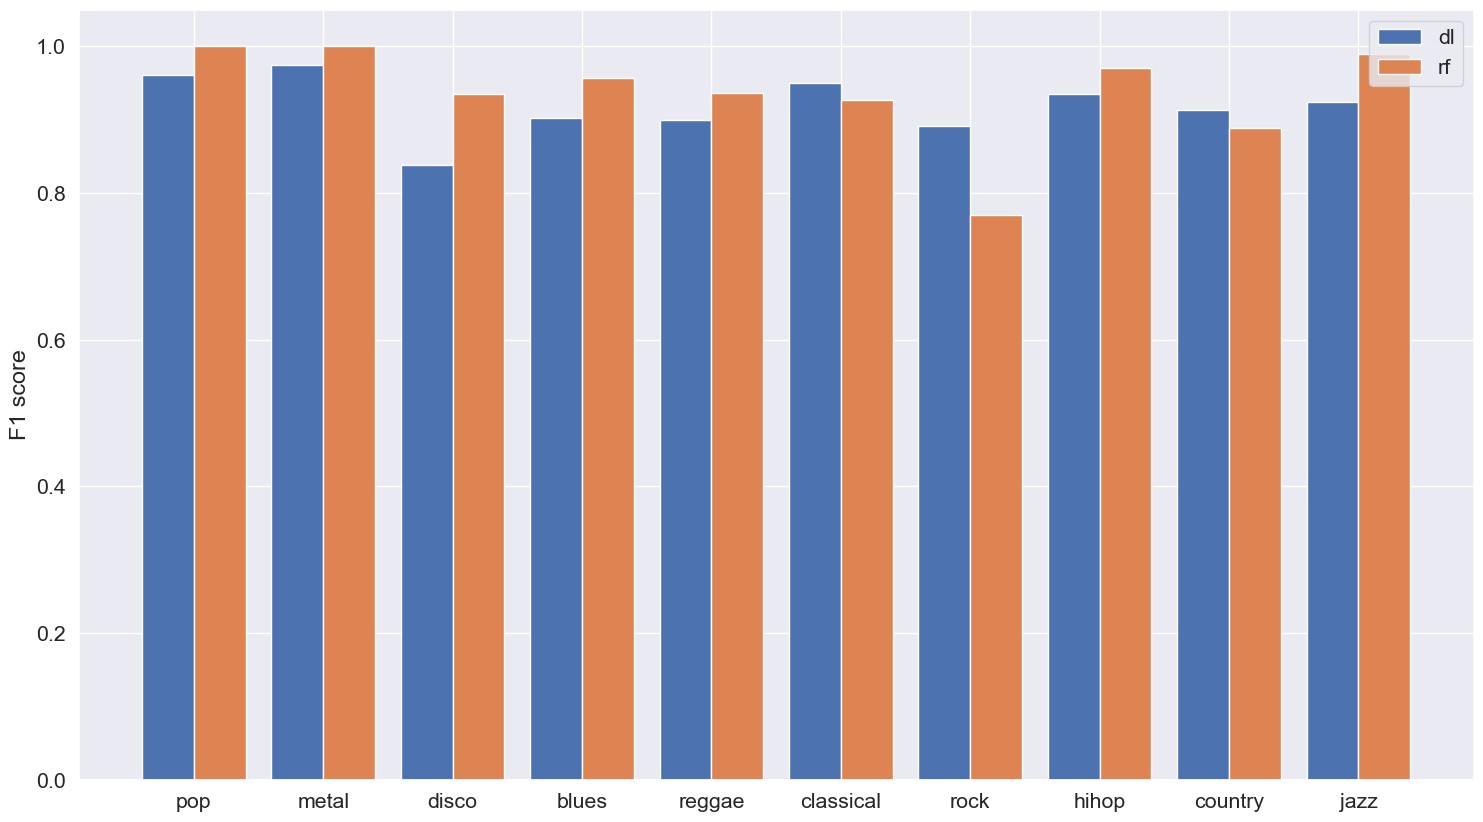

In [11]:
import numpy as np
print(f"Mean f1 score for deep learning : {perf_dl.F1Score.mean()}\n"
      f"Mean f1 score for random forest : {perf_rf.F1Score.mean()}\n")
plt.figure(figsize=(18,10))
X_axis = np.arange(len(utils.genreNames)) 
plt.bar(X_axis - 0.2, perf_dl.F1Score, 0.4, label = 'dl') 
plt.bar(X_axis + 0.2, perf_rf.F1Score, 0.4, label = 'rf') 
plt.xticks(X_axis, utils.genreNames) 
plt.ylabel("F1 score") 
plt.legend()